# **Let's Start the Data Pre-Processing**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")
df.head()

<ipython-input-2-18ab1675e41e>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# **Lets inspect the dataset**

In [ ]:
import numpy as np
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if str(x).isalpha() else x)
df.isnull().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce')
df['quantity tons'] = df['quantity tons'].astype(float)
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [ ]:
len(df.id.unique())# since id is unique for every transaction its no use.

181672

In [ ]:
#since material has 55.39% of null values filling it would result in overfitting of our model so lets remove it
df.drop(['id','material_ref'],axis=1,inplace=True)

In [ ]:
#to remove negative values from numeric columns
for i in ['quantity tons','thickness','width','selling_price']:
  df = df[df[i] > 0]

In [ ]:
df.dropna(inplace=True)
df['customer'] = df['customer'].astype('int64')
df['application'] = df['application'].astype('int64')
df['country'] = df['country'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181622 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181622 non-null  datetime64[ns]
 1   quantity tons  181622 non-null  float64       
 2   customer       181622 non-null  int64         
 3   country        181622 non-null  int64         
 4   status         181622 non-null  object        
 5   item type      181622 non-null  object        
 6   application    181622 non-null  int64         
 7   thickness      181622 non-null  float64       
 8   width          181622 non-null  float64       
 9   product_ref    181622 non-null  int64         
 10  delivery date  181622 non-null  datetime64[ns]
 11  selling_price  181622 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 18.0+ MB


In [ ]:
print(df.isnull().sum())
df.shape

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


(181622, 12)

# **Check the Correlation, Skewness, Outlier**

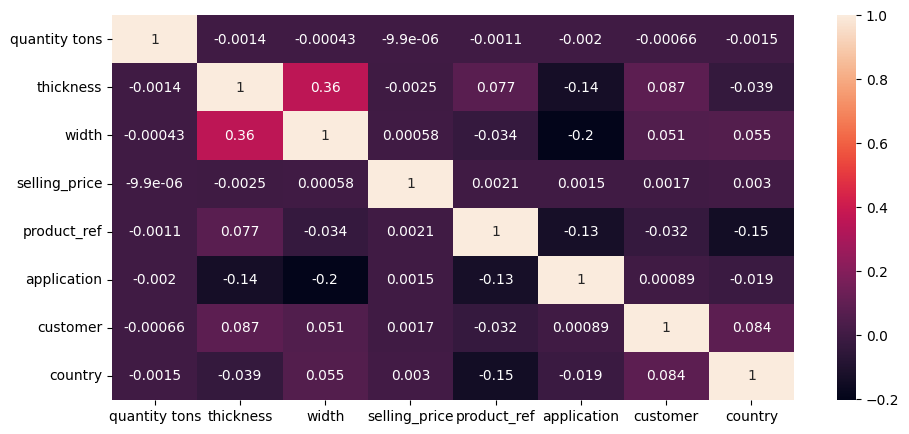

In [ ]:
#first lets check the correlation
import seaborn as sns
import matplotlib.pyplot as plt

def show_heatmap(c):
  plt.figure(figsize=(11,5))
  sns.heatmap(c.corr(),annot=True)
  plt.show()

c = df[['quantity tons','thickness','width','selling_price','product_ref','application','customer','country']]
show_heatmap(c)

Evidently quantity has negative corelation lets correct the skewness and then check

In [ ]:
# to check skew values (application,customer,country,product_ref,item type are all codes so no need to check them)
from scipy.stats import skew
for i in ['quantity tons','thickness','width','selling_price']:
  print(i ,"|",  skew(df[i]))

quantity tons | 424.62769478146345
thickness | 15.302832491963118
width | 0.3748219888993155
selling_price | 301.3432925448491


In [ ]:
n = df.copy()

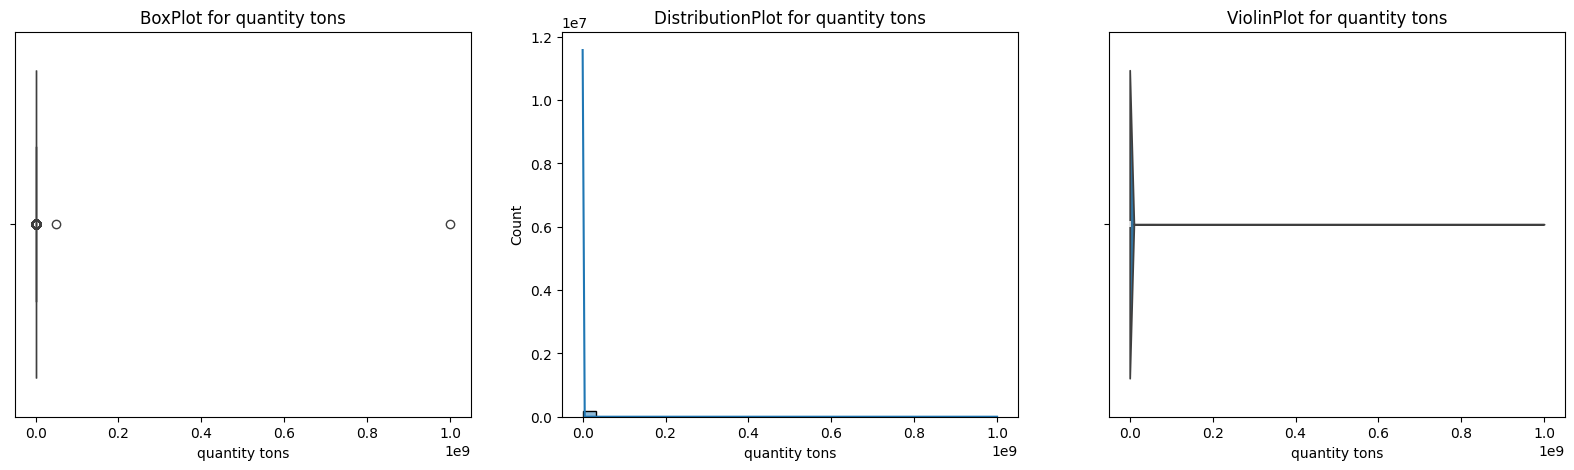

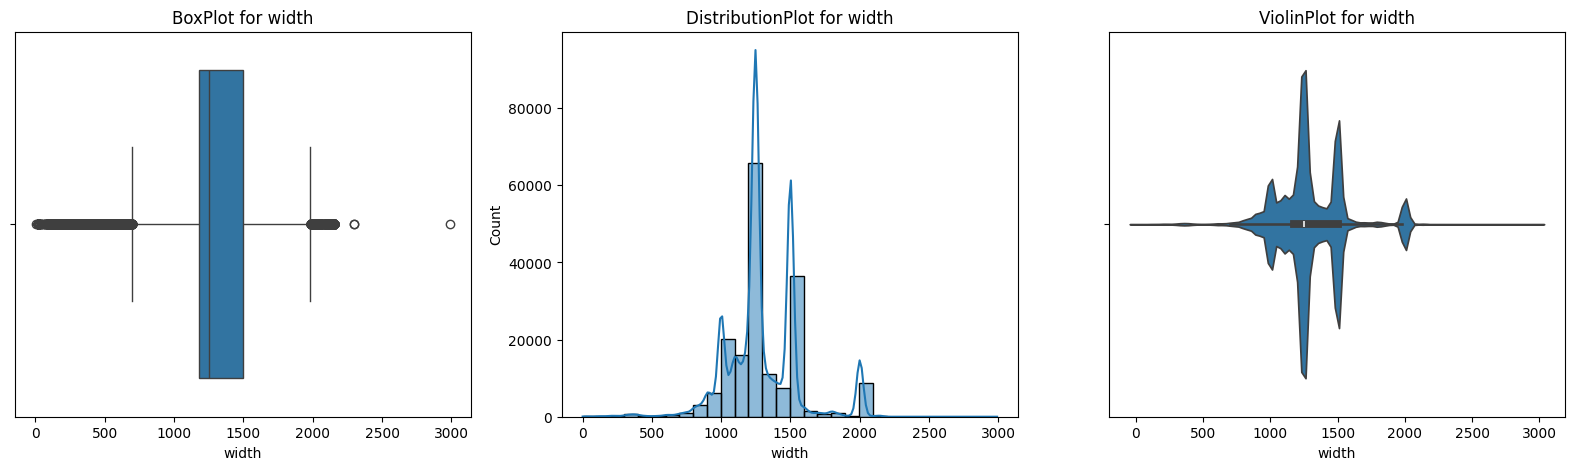

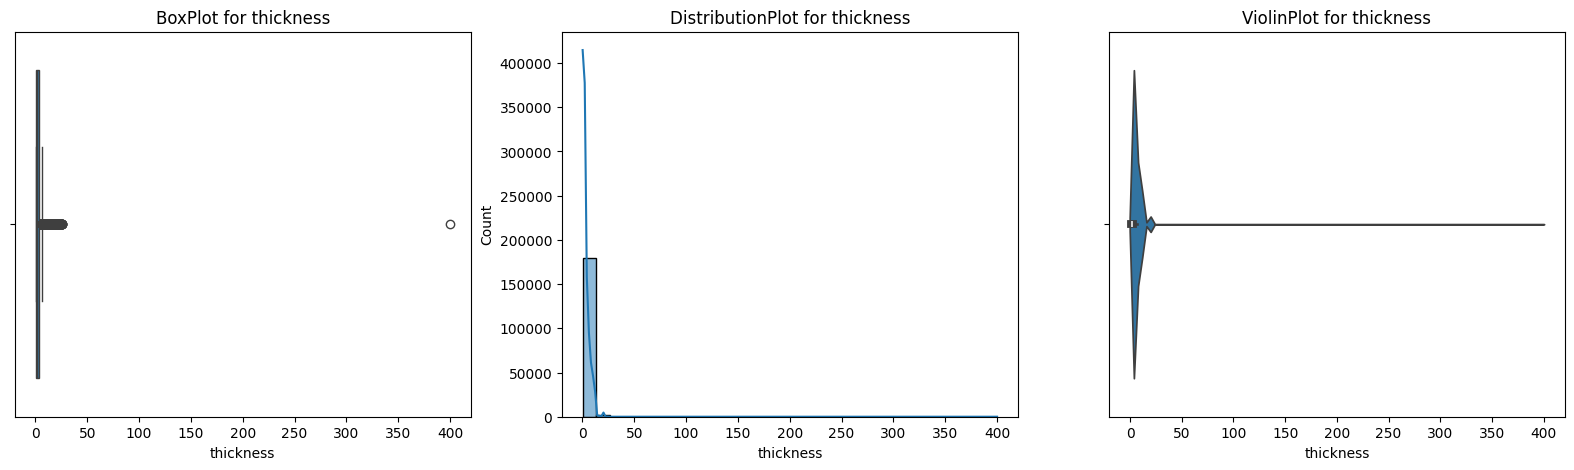

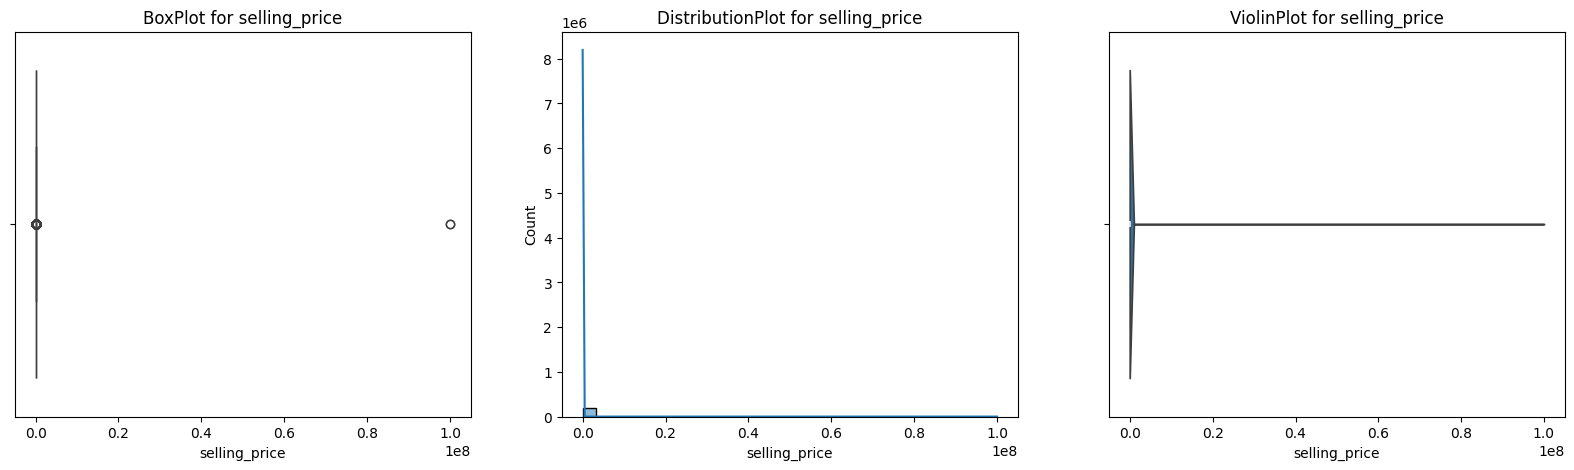

In [ ]:
# visualizing skewness and outliers

def check_plot(df,column):
  plt.figure(figsize=(20,5))

  plt.subplot(1,3,1)
  sns.boxplot(data = df,x=column)
  plt.title(f"BoxPlot for {column}")

  plt.subplot(1,3,2)
  sns.histplot(data=df,x=column,kde=True,bins=30)
  plt.title(f"DistributionPlot for {column}")

  plt.subplot(1,3,3)
  sns.violinplot(data=df,x=column)
  plt.title(f"ViolinPlot for {column}")

  plt.show()

for col in ['quantity tons', 'width', 'thickness', 'selling_price']:
  check_plot(n,col)

# **Removing Skewness using log transformation**

In [ ]:
v = n.copy()
print(v.shape)
v.head()

(181622, 12)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,2021-03-01,577.00


In [ ]:
from scipy.stats import skew

for i in ['thickness','quantity tons','selling_price','width']:
  print(i,skew(v[i]))

thickness 15.302832491963118
quantity tons 424.62769478146345
selling_price 301.3432925448491
width 0.3748219888993155


In [ ]:
for i in ['thickness','quantity tons','selling_price']:
  v[i] = np.log(v[i])
  print(i,skew(v[i]))

thickness 0.3491232104242874
quantity tons -0.06876190881973908
selling_price -5.342742555568181


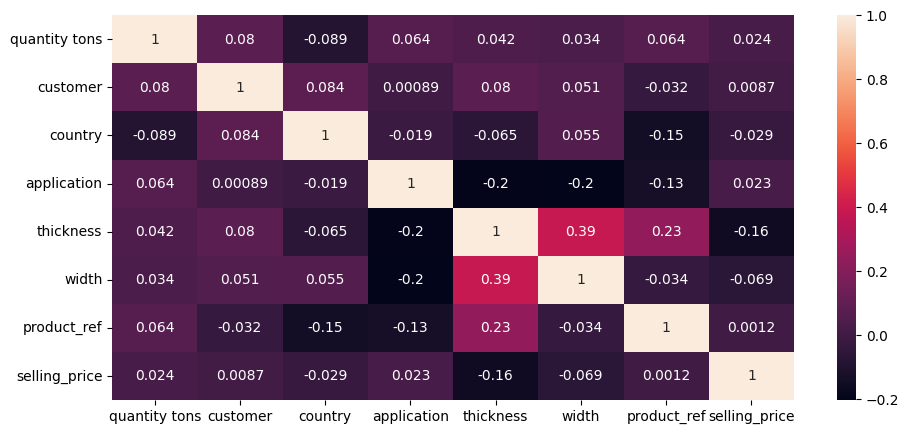

In [ ]:
show_heatmap(v.drop(['item type','status','item_date','delivery date'],axis=1))

# **Model Selection**

In [ ]:
v.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
m = v[(v['status']=='Won') | (v['status']=='Lost')]
print(m.shape)
m = m.drop(['item_date','delivery date'],axis=1)
m.head()

(150428, 12)


,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308,28,Won,W,10,0.693147,1500.0,1670798778,6.749931
1,6.643822,30202938,25,Won,W,41,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30153963,30,Won,WI,28,-0.967584,952.0,628377,6.468211
3,5.310301,30349574,32,Won,S,59,0.832909,1317.0,1668701718,6.643790
4,6.666354,30211560,28,Won,W,10,1.386294,2000.0,640665,6.357842


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

it_ohe = OneHotEncoder(handle_unknown='ignore')

m['status'] = m['status'].map({'Won':1, "Lost":0})

item = it_ohe.fit_transform(m[['item type']]).toarray()
it_column = it_ohe.get_feature_names_out(['item type'])
original_column = ['quantity tons', 'customer', 'country','status','application', 'thickness', 'width', 'product_ref','selling_price']
all_column = original_column + list(it_column)

x_combined = np.concatenate((m[['quantity tons', 'customer', 'country','status','application', 'thickness', 'width', 'product_ref','selling_price']].values,item),axis=1)
x = pd.DataFrame(x_combined,columns=all_column)

scaler = MinMaxScaler()
x[['quantity tons','thickness','width','selling_price']] = scaler.fit_transform(x[['quantity tons','thickness','width','selling_price']])
x.head()

,quantity tons,customer,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.683847,30156308.0,28.0,1.0,10.0,0.312466,0.501506,1.670799e+09,0.665250,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.800817,30202938.0,25.0,1.0,41.0,0.193564,0.404483,1.668702e+09,0.680223,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770488,30153963.0,30.0,1.0,28.0,0.096962,0.318167,6.283770e+05,0.644547,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.742001,30349574.0,32.0,1.0,59.0,0.330602,0.440281,1.668702e+09,0.657449,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.801811,30211560.0,28.0,1.0,10.0,0.402412,0.668786,6.406650e+05,0.636436,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = x.drop(['status'],axis=1)
y = x['status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

models =[
        XGBClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        ]

for model in models:
    model_name = type(model).__name__

    reg = model.fit(X_train,y_train)

    train_pre = model.predict(X_train)
    test_pre = model.predict(X_test)

    print(f"-------------------------{model_name}---------------------------------")
    print('Accuracy Train Score:', accuracy_score(y_train, train_pre))
    print('Precision Train Score:', precision_score(y_train, train_pre, average='weighted'))
    print(" Confusion Matrix ")
    print(confusion_matrix(y_train, train_pre),'\n')
    print('Accuracy Test Score:', accuracy_score(y_test, test_pre))
    print('Precision Test Score:', precision_score(y_test, test_pre, average='weighted'))
    print(" Confusion Matrix ")
    print(confusion_matrix(y_test, test_pre),'\n')

-------------------------XGBClassifier---------------------------------
Accuracy Train Score: 0.9132721743032358
Precision Train Score: 0.9111709914227497
 Confusion Matrix 
[[20440  7059]
 [ 3378 89465]] 

Accuracy Test Score: 0.9003523233397593
Precision Test Score: 0.897523988967678
 Confusion Matrix 
[[ 4951  1981]
 [ 1017 22137]] 

-------------------------DecisionTreeClassifier---------------------------------
Accuracy Train Score: 1.0
Precision Train Score: 1.0
 Confusion Matrix 
[[27499     0]
 [    0 92843]] 

Accuracy Test Score: 0.9143455427773716
Precision Test Score: 0.9144996594820839
 Confusion Matrix 
[[ 5661  1271]
 [ 1306 21848]] 

-------------------------RandomForestClassifier---------------------------------
Accuracy Train Score: 0.9999916903491716
Precision Train Score: 0.9999916906513406
 Confusion Matrix 
[[27499     0]
 [    1 92842]] 

Accuracy Test Score: 0.9347869440935983
Precision Test Score: 0.9339018356911505
 Confusion Matrix 
[[ 5765  1167]
 [  795 223

# **Evaluating Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



rfc = RandomForestClassifier()

rfc_para = {'n_estimators': [100,200,300,400,500],
          'max_depth': [50,60,70,80],
          'criterion':['gini', 'log_loss', 'entropy'],
          'min_samples_split':[8,9,10,11],
          'min_samples_leaf':[1,2,3,4],
          'max_features':['sqrt', 'log2', None],
          }

rfc_grid = RandomizedSearchCV(rfc,rfc_para,cv=5,n_iter=10,n_jobs=-1,verbose=2)
rfc_grid.fit(X_train,y_train)
print("Best Parameters:", rfc_grid.best_params_)
print("Best Score:", rfc_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 500, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 80, 'criterion': 'log_loss'}
Best Score: 0.9317279110436283


In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

model =  RandomForestClassifier(n_jobs= -1, n_estimators= 500, min_samples_split =9, min_samples_leaf= 1, max_features= None, max_depth= 80, criterion= 'log_loss')

model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"------------------{type(model).__name__}------------------")
print("Train RMSE:",accuracy_score(y_train,train_pred))
print("Train R2:",precision_score(y_train,train_pred),'\n')
print("Test RMSE:",accuracy_score(y_test,test_pred))
print("Test R2:",precision_score(y_test,test_pred))

------------------RandomForestClassifier------------------
Train RMSE: 0.9891559056688438
Train R2: 0.9911363880244661 

Test RMSE: 0.9362161802831882
Test R2: 0.9541857381186637


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(n_jobs= -1, n_estimators= 500, min_samples_split =9, min_samples_leaf= 1, max_features= None, max_depth= 80, criterion= 'log_loss'),X,y,cv=5)
print(score)
print(score.mean())

[0.82350595 0.81881938 0.82945556 0.83240818 0.83982051]
0.8288019160319443


# **Saving Model**

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


In [ ]:
import pickle

with open('classification_model.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
with open('classification_it_ohe.pkl','wb') as f:
  pickle.dump(it_ohe,f)

In [ ]:
with open("classification_scaler.pkl",'wb') as f:
  pickle.dump(scaler,f)

In [ ]:
c = model.predict(X_test)

In [ ]:
y = pd.DataFrame(c)
y.value_counts()

1.0    23426
0.0     6660
Name: count, dtype: int64

In [ ]:
y.value_counts(normalize=True)

1.0    0.778635
0.0    0.221365
Name: proportion, dtype: float64

In [ ]:
!pip install scikit-learn == 1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1
